In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

# Least Squares Approximation using Projection

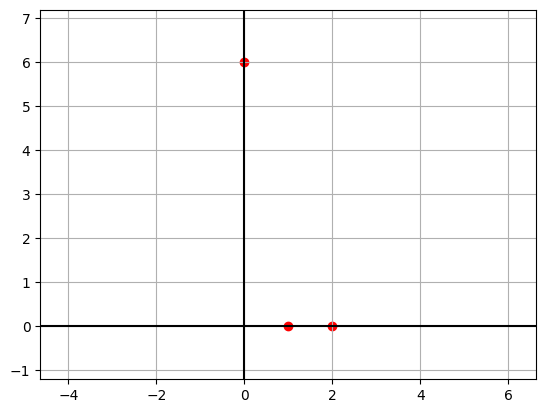

In [2]:
points = np.array([
    [0, 6],
    [1, 0],
    [2, 0],
    # [2, 2],
])
x = points[:, 0]
y = points[:, 1]

plt.figure()
plt.scatter(x, y, color="red", label="Points")

plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.axis("equal")
plt.margins(x=0.2, y=0.2)
plt.grid(True)
plt.show()

Equation for a line: $y = c + mx$.

$$
\begin{flalign*}
A \begin{bmatrix} c \\ m \end{bmatrix} = y\\
&&
\end{flalign*}
$$

In [3]:
A = np.column_stack([np.ones_like(x), x])
print("Matrix A:")
print(A)
print("Vector y:")
print(y)

Matrix A:
[[1 0]
 [1 1]
 [1 2]]
Vector y:
[6 0 0]


In [4]:
rank_A = np.linalg.matrix_rank(A)

Ab = np.hstack([A, y.reshape(-1, 1)])
rank_Ab = np.linalg.matrix_rank(Ab)

print("Rank of A:", rank_A)
print("Rank of [A|y]:", rank_Ab)

assert rank_Ab > rank_A

Rank of A: 2
Rank of [A|y]: 3


Rank [A|y] > A means there are no exact solutions for $Ax = b$. So let's try to approaximate with least squares.

Let's mulitply $A$ and $b$ by $A^T$ and solve it for $\hat{x}$.

$$
\begin{flalign*}
\hat{x} = (A^T A)^{-1} A^T b
&&
\end{flalign*}
$$
where $\hat{x} = \begin{bmatrix} c \\ m \end{bmatrix}$

In [5]:
x_hat = np.linalg.inv(A.T @ A) @ A.T @ y
print(x_hat)
display(Markdown(f"So let's draw: $y = {x_hat[0]:.2f} + {x_hat[1]:.2f}x$"))

[ 5. -3.]


So let's draw: $y = 5.00 + -3.00x$

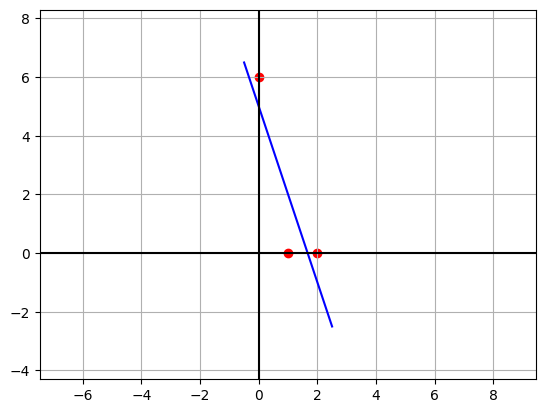

In [6]:
plt.figure()
plt.scatter(x, y, color="red", label="Points")

least_sq_x = np.linspace(min(x) - 0.5, max(x) + 0.5, 2)
least_sq_y = x_hat[0] + x_hat[1] * least_sq_x
plt.plot(least_sq_x, least_sq_y, color="blue", label=f"Least squares")

plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.axis("equal")
plt.margins(x=0.2, y=0.2)
plt.grid(True)
plt.show()

Now let's try to fit a parabola: $y = c + mx + nx^2$.

$$
\begin{flalign*}
B \begin{bmatrix} c \\ m \\ n \end{bmatrix} = y\\
&&
\end{flalign*}
$$

In [7]:
B = np.column_stack([np.ones_like(x), x, x**2])
x_hat_sq = np.linalg.inv(B.T @ B) @ B.T @ y
print(x_hat_sq)

[ 6. -9.  3.]


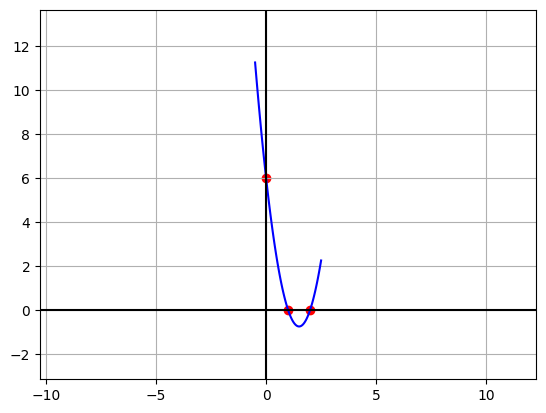

In [8]:
plt.figure()
plt.scatter(x, y, color="red", label="Points")

par_least_sq_x = np.linspace(min(x) - 0.5, max(x) + 0.5, 100)
par_least_sq_y = x_hat_sq[0] + x_hat_sq[1] * par_least_sq_x + x_hat_sq[2] * par_least_sq_x ** 2
plt.plot(par_least_sq_x, par_least_sq_y, color="blue", label=f"Least squares")

plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.axis("equal")
plt.margins(x=0.2, y=0.2)
plt.grid(True)
plt.show()